In [0]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names=['T-shirt/top','Trousr','pullover','Dress','coat','samdal','shirt','sneaker','bag','ankle boot']

In [0]:
class_names[5]

'samdal'

In [0]:
def normalize(images, labels):
  images=tf.cast(images, tf.float32)
  images/=255
  return images,labels

Train=[train_img,train_lbl]=normalize(train_images,train_labels)
[test_img,test_lbl]=normalize(test_images,test_labels)


In [0]:
import matplotlib.pyplot as plt 
tf.cast(train_images[1],tf.float32)

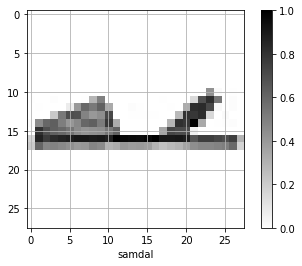

In [0]:
import numpy as np
plt.figure()

plt.imshow(np.asarray(test_img[111]).reshape((28,28)),cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.xlabel(class_names[int(test_lbl[111])])
plt.show()

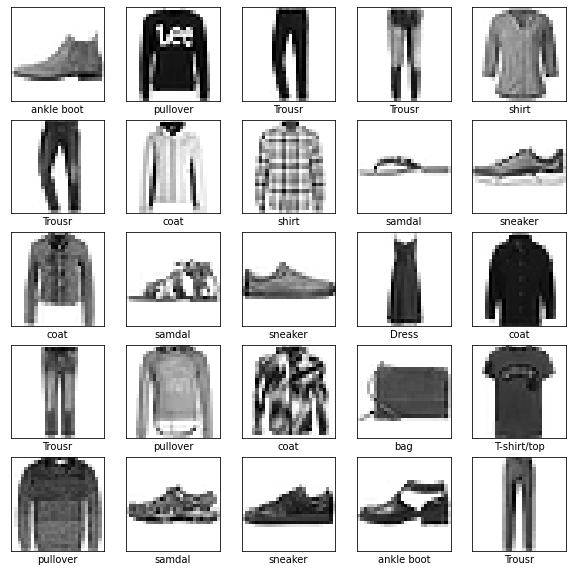

In [0]:
plt.figure(figsize=(10,10))
j=0
for i in test_img[0:25]:
  i=np.asarray(i).reshape((28,28))
  plt.subplot(5,5,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(i,cmap=plt.cm.binary)
  plt.xlabel(class_names[int(test_lbl[j])])
  j+=1
plt.show()

In [0]:
import math
model=tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img,train_lbl, epochs=10,steps_per_epoch=math.ceil(len(train_img)/32))


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5023 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

(<matplotlib.image.AxesImage at 0x7f425a47a908>, 'pullover')

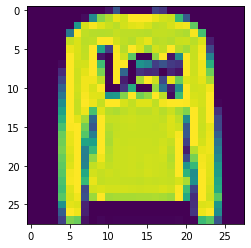

In [0]:
#Y prediction
y_pred=model.predict([test_img])
plt.imshow(test_img[1]),class_names[int(np.asarray(np.where(y_pred[1]==np.max(y_pred[1]))))]

In [0]:
#predicted values
j=0
Y_pred=[]
for i in y_pred:
  Y_pred.append(int(np.asarray(np.where(y_pred[j]==(np.max(i))))))  #can also be done by np.argmax(y_pred[10]) ## Very important
  j+=1
Y_pred=np.asarray(Y_pred)  


In [0]:
count=0
for i in range(len(test_lbl)):
  if Y_pred[i]==test_lbl[i]:
    count+=1
print("Accuaracy of the model: {}".format(count/len(test_lbl)*100))

Accuaracy of the model: 88.56


In [0]:
sumation=0
for i in y_pred[1]:
  sumation+=i
print(sumation)

1.0000000127319348


In [0]:
import math
loss_model,accuracy_model=model.evaluate(test_img,test_lbl,steps=math.ceil(len(test_lbl)/32),batch_size=32)
print("Model Accuracy:{} and Model Loss={}".format(loss_model,np.round(accuracy_model*100),4))

313/313 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8856
Model Accuracy:0.3298610746860504 and Model Loss=89.0


In [0]:
##Graph functions 
def plot_image(i,predictions_array,true_labels,images):
  predictions_array,true_label,img=predictions_array[i],true_labels[i],images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0],cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions_array)
  if predicted_label== true_label:
    color='blue'
  else:
    color='red' 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

def plot_value_array(i,predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot= plt.bar(range(10),predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

In [0]:
np.argmax(y_pred[0])==test_lbl[0]
np.max(y_pred[0])*100

99.32852983474731

In [0]:
test_lbl[0]

9

In [0]:
i=0
#plot_image(i, y_pred, test_lbl, test_img)
def plot_image(i,prediction_label, original_label, image_matrix,class_names):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_matrix[i],cmap=plt.cm.binary)
  predicted_label=np.argmax(prediction_label[i])
  if predicted_label==original_label[i] :
    color='blue'
  else:
    color='red' 
  plt.xlabel("{} {:2.0f}% | Original image({})".format(class_names[predicted_label],
                                       100*np.max(prediction_label[i]),
                                       class_names[original_label[i]]),
             color=color)

def plot_value_array(i,predictions_array, true_label,image):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #plt.imshow(image[i],cmap=plt.cm.binary)
  thisplot= plt.bar(range(10),predictions_array[i], color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array[i])
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i]].set_color('blue')
  plt.ylim([0,1])
 


Text(0.5, 0, 'Blue: Original Confidence')

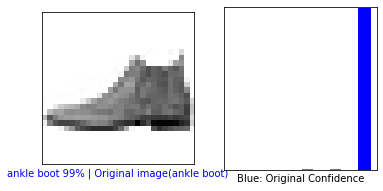

In [0]:
import matplotlib.pyplot as plt
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred, test_lbl, test_img,class_names)
plt.subplot(1,2,2)
plot_value_array(i, y_pred, test_lbl, test_img )
plt.xlabel('Blue: Original Confidence')


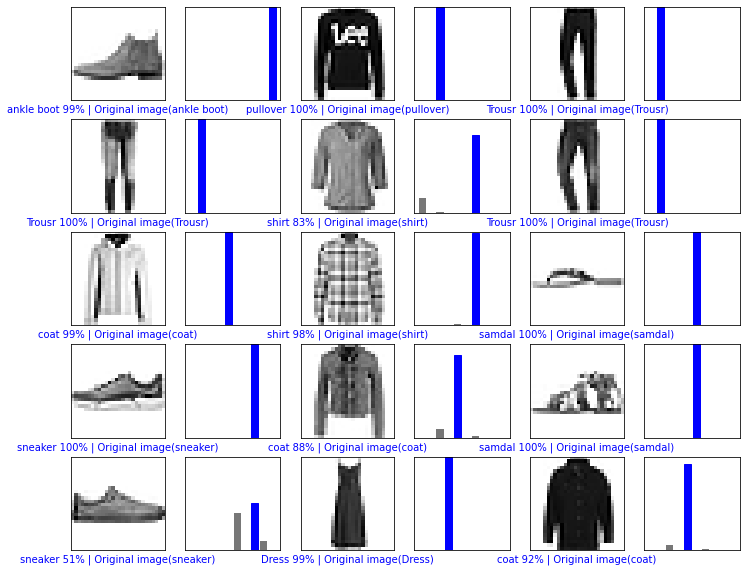

In [0]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, y_pred, test_lbl, test_img,class_names)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_value_array(i, y_pred, test_lbl, test_img )

In [0]:
img=test_img[0]
img=np.array([img])
print(img.shape)

(1, 28, 28)


In [0]:
pred_single= model.predict(img)
pred_single

array([[3.1237118e-06, 7.7786666e-12, 1.5555901e-09, 6.9606989e-12,
        1.5593206e-10, 2.6545182e-03, 4.2935127e-07, 4.0565589e-03,
        1.3659006e-07, 9.9328530e-01]], dtype=float32)

In [0]:
test_lbl

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

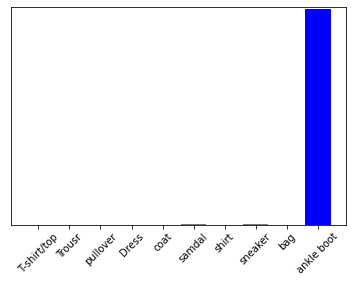

In [0]:
plot_value_array(0, pred_single, test_lbl, class_names)
_ = plt.xticks(range(10),class_names, rotation=45)